In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from mlxtend.plotting import plot_decision_regions

In [6]:
np.random.seed(42)
X, y = make_circles(n_samples=500, factor=0.1, noise=0.35, random_state=42)

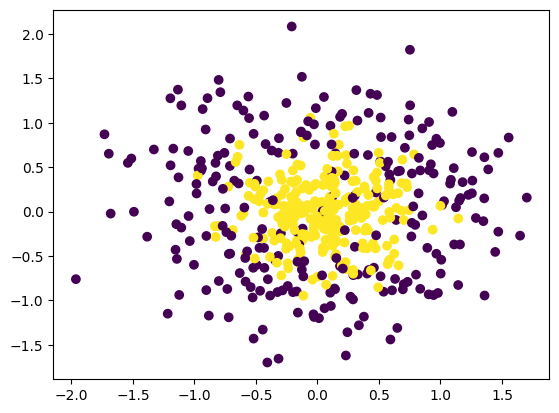

In [3]:
plt.scatter(X[:,0], X[:,1], c=y)

In [7]:
from sklearn.ensemble import AdaBoostClassifier

In [8]:
abc = AdaBoostClassifier()
np.mean(cross_val_score(abc, X,y, cv=10, scoring='accuracy'))

0.786

In [9]:
abc.fit(X,y)

AdaBoostClassifier()

<Axes: >

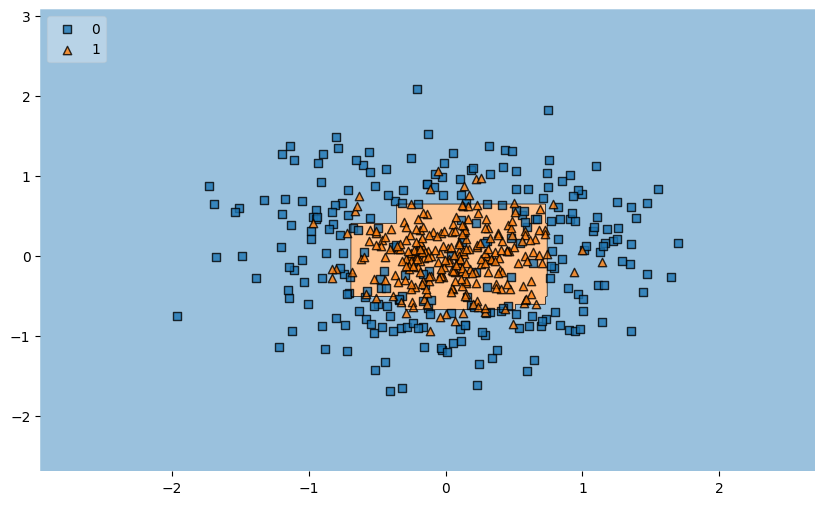

In [19]:
plt.figure(figsize=(10, 6))
plot_decision_regions(X,y,clf=abc,legend=2)

<Axes: >

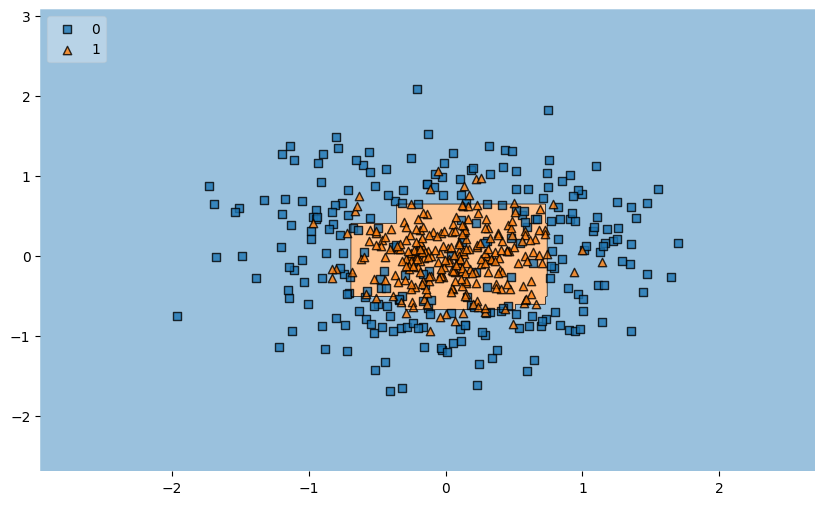

In [17]:
plt.figure(figsize=(10, 6))
abc = AdaBoostClassifier(n_estimators=100, learning_rate=0.1)
abc.fit(X,y)
plot_decision_regions(X,y,clf=abc,legend=2)

In [10]:
from sklearn.model_selection import GridSearchCV

In [11]:
param_grid = {
    'n_estimators': [50, 100, 150],       # Number of boosting stages to be run
    'learning_rate': [0.01, 0.1, 1, 10],  # Learning rate for weight adjustments
    'algorithm': ['SAMME', 'SAMME.R']     # Algorithm type (SAMME or SAMME.R)
}

In [12]:
grid_search = GridSearchCV(estimator=abc, param_grid=param_grid, cv=10, scoring='accuracy')

In [13]:
grid_search.fit(X,y)

print(grid_search.best_score_, grid_search.best_params_)

0.826 {'algorithm': 'SAMME', 'learning_rate': 0.1, 'n_estimators': 150}
